<a href="https://colab.research.google.com/github/dote7ant/Flight_delay_-prediction/blob/master/Copy_of_Copy_of_Thee_Iconic_explorers_Project_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [5]:
# install catboost
!pip install catboost

In [6]:
# install fastai
!pip install fastai2

In [7]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor

from math import sqrt

from fastai2.tabular.all import add_datepart
import warnings
warnings.filterwarnings('ignore')


In [8]:
# Loading the train Data from the source i.e. csv
train = pd.read_csv('/content/Train (6).csv')

In [9]:
# Loading the test Data from the source i.e. csv
test = pd.read_csv('/content/Test (3).csv')



## 3. Checking the Data

#### Train Data

In [10]:
# check number of rows and columns in the data set
print("There are", train.shape[0], "rows and", train.shape[1], "columns in our data set.")

There are 107833 rows and 10 columns in our data set.


In [11]:
# Previewing the top of our dataset
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [12]:
# Previewing the bottom of our dataset
train.tail()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0
107832,train_id_107832,2018-11-13,UG 0002,TUN,DJE,2018-11-13 06:15:00,2018-11-13 07.05.00,SCH,TU CR9ISA,0.0


In [13]:
# check train info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [14]:
# Checking whether each column has an appropriate datatype
train.dtypes

ID         object
DATOP      object
FLTID      object
DEPSTN     object
ARRSTN     object
STD        object
STA        object
STATUS     object
AC         object
target    float64
dtype: object

Most of the columns have incorrect datatypes, we will need to convert them into the correct datatypes during cleaning

In [15]:
# we check for null values
train.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

There are no null values.

In [16]:
# check for duplicates
print("There are duplicates in our data set:", train.duplicated().any())

There are duplicates in our data set: False


No duplicates in the data set.

In [17]:
# checking for unique values in all the columns
train.nunique()

ID        107833
DATOP       1011
FLTID       1861
DEPSTN       132
ARRSTN       128
STD        81697
STA        85136
STATUS         5
AC            68
target       968
dtype: int64

In [18]:
# check the unique values in each column
for column in train.columns:
  print("***************************", column, "********************************")
  print("This column has", train[column].nunique(), "unique values, they are shown below:\n")
  print(train[column].unique())
  print('________________________________________________________________________________________________\n')

*************************** ID ********************************
This column has 107833 unique values, they are shown below:

['train_id_0' 'train_id_1' 'train_id_2' ... 'train_id_107830'
 'train_id_107831' 'train_id_107832']
________________________________________________________________________________________________

*************************** DATOP ********************************
This column has 1011 unique values, they are shown below:

['2016-01-03' '2016-01-13' '2016-01-16' ... '2018-12-28' '2018-12-29'
 '2018-12-30']
________________________________________________________________________________________________

*************************** FLTID ********************************
This column has 1861 unique values, they are shown below:

['TU 0712 ' 'TU 0757 ' 'TU 0214 ' ... 'UG 1020 ' 'UG 1501 ' 'UG 1004 ']
________________________________________________________________________________________________

*************************** DEPSTN ********************************
This

#### Test Data

In [19]:
# check number of rows and columns in the data set
print("There are", test.shape[0], "rows and", test.shape[1], "columns in our data set.")

There are 9333 rows and 9 columns in our data set.


The test data has 9,333 records and 9 columns

In [20]:
# Previewing the top of our dataset
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [21]:
# Previewing the bottom of our dataset
test.tail()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
9328,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV
9329,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG
9330,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA
9331,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD
9332,test_id_9332,2018-09-19,UG 0009,DJE,TUN,2018-09-19 16:15:00,2018-09-19 17.15.00,SCH,UG AT7LBD


In [22]:
# check the data set info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      9333 non-null   object
 1   DATOP   9333 non-null   object
 2   FLTID   9333 non-null   object
 3   DEPSTN  9333 non-null   object
 4   ARRSTN  9333 non-null   object
 5   STD     9333 non-null   object
 6   STA     9333 non-null   object
 7   STATUS  9333 non-null   object
 8   AC      9333 non-null   object
dtypes: object(9)
memory usage: 656.4+ KB


In [23]:
# Checking whether each column has an appropriate datatype
test.dtypes

ID        object
DATOP     object
FLTID     object
DEPSTN    object
ARRSTN    object
STD       object
STA       object
STATUS    object
AC        object
dtype: object

Most of the data has incorrect datatypes, we will change them into correct types during cleaning

In [24]:
# checking for unique values in all the columns
test.nunique()

ID        9333
DATOP       86
FLTID      700
DEPSTN      82
ARRSTN      84
STD       7012
STA       7290
STATUS       5
AC          44
dtype: int64

In [25]:
# we check for null values
test.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
dtype: int64

There are no null values.

In [26]:
# check for duplicates
print("There are duplicates in our data set:", test.duplicated().any())

There are duplicates in our data set: False


There are no duplicates.

In [27]:
# check the unique values in each column
for column in test.columns:
  print("***************************", column, "********************************")
  print("This column has", test[column].nunique(), "unique values, they are shown below:\n")
  print(test[column].unique())
  print('________________________________________________________________________________________________\n')

*************************** ID ********************************
This column has 9333 unique values, they are shown below:

['test_id_0' 'test_id_1' 'test_id_2' ... 'test_id_9330' 'test_id_9331'
 'test_id_9332']
________________________________________________________________________________________________

*************************** DATOP ********************************
This column has 86 unique values, they are shown below:

['2016-05-04' '2016-05-05' '2016-05-06' '2016-05-11' '2016-05-23'
 '2016-05-27' '2016-05-28' '2016-05-01' '2016-05-02' '2016-05-03'
 '2016-05-07' '2016-05-13' '2016-05-18' '2016-05-20' '2016-05-21'
 '2016-05-08' '2016-05-09' '2016-05-10' '2016-05-12' '2016-05-14'
 '2016-05-15' '2016-05-16' '2016-05-25' '2016-05-19' '2016-05-26'
 '2016-05-29' '2016-05-17' '2016-05-22' '2016-05-24' '2016-05-30'
 '2017-02-26' '2017-02-27' '2017-02-02' '2017-02-06' '2017-02-10'
 '2017-02-13' '2017-02-14' '2017-02-18' '2017-02-23' '2017-02-07'
 '2017-02-08' '2017-02-17' '2017-02-01'

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

We will start off with cleaning the train dataset followed by test dataset

#### Train

In [28]:
# converting the incorrect datatypes to right data types
train['DATOP'] = pd.to_datetime(train['DATOP'])
train['FLTID'] = train['FLTID'].astype('category')
train['DEPSTN'] = train['DEPSTN'].astype('category')
train['ARRSTN'] = train['ARRSTN'].astype('category')
train['STD'] = pd.to_datetime(train['STD'])

# replacing period with column to get the time column in to the right format
train['STA'] = train['STA'].str.replace('.', ':') 
train['STA'] = pd.to_datetime(train['STA'])
train['STATUS'] = train['STATUS'].astype('category')
train['AC'] = train['AC'].astype('category')

In [29]:
# confirming that the columns have been converted to the right types
train.dtypes

ID                object
DATOP     datetime64[ns]
FLTID           category
DEPSTN          category
ARRSTN          category
STD       datetime64[ns]
STA       datetime64[ns]
STATUS          category
AC              category
target           float64
dtype: object

In [30]:
# Checking for anomalies in the date columns
# first we check split the dates into year, month, day , hr, and min
# splitting DATOP into year, month, day
train['year_datop'] = pd.to_datetime(train['DATOP']).dt.year
train['month_datop'] = pd.to_datetime(train['DATOP']).dt.month
train['day_datop'] = pd.to_datetime(train['DATOP']).dt.day

# splitting STD into hours and minutes
train['std_hr'] = pd.to_datetime(train['STD']).dt.hour
train['std_min'] = pd.to_datetime(train['STD']).dt.minute

# splitting STA into hours and minutes
train['sta_hr'] = pd.to_datetime(train['STA']).dt.hour
train['sta_min'] = pd.to_datetime(train['STA']).dt.minute

In [31]:
# confirming that the split happened
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,10,30,12,55
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,15,5,16,55
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,1,16,4,10,6,45
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,1,17,14,10,17,0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,1,17,14,30,15,50


In [32]:
# check the years in the data set
train['year_datop'].unique()

array([2016, 2017, 2018])

In [33]:
# check the months in the data set
train['month_datop'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [34]:
# check the days in the data set
train['day_datop'].unique()

array([ 3, 13, 16, 17, 18, 20, 21, 22, 23, 24, 27,  1,  2,  4,  5,  6,  7,
        8, 10, 14, 19, 28, 29, 26, 30, 31, 12, 15, 11, 25,  9])

In [35]:
# check the hours in the data set
train['std_hr'].unique()

array([10, 15,  4, 14, 16,  7, 18, 19, 20, 17,  5,  8, 11,  6,  1, 12,  9,
        0, 22, 23, 13,  3, 21,  2])

In [36]:
# check the minutes in the data set
train['std_min'].unique()

array([30,  5, 10, 20, 15, 35, 40, 45, 55, 50,  0, 25, 46, 19, 13,  1, 39,
       41, 47,  7,  9, 59, 11, 16, 44,  3, 27, 38, 21,  6, 24, 51, 54, 53,
       48, 22, 23, 18, 34, 32,  2, 17, 14, 28, 12,  8, 56, 49, 58, 31, 26,
       43, 37, 57, 42, 36, 29, 52,  4, 33])

In [37]:
# check the scheduled time of arrival hours in the data set
train['sta_hr'].unique()

array([12, 16,  6, 17, 15, 18,  9, 20,  0, 23, 21,  8, 13, 14, 10, 22,  7,
       11,  5, 19,  2,  1,  4,  3])

In [38]:
# check the scheduled time of arrival minutes in the data set
train['sta_min'].unique()

array([55, 45,  0, 50, 15, 30, 40, 10, 20, 25,  5, 35, 31, 34, 47, 43, 59,
        8, 17, 37, 54, 56, 22, 39, 27, 11, 24,  3,  1, 52, 41,  9, 16,  6,
       19, 48, 29, 26, 36, 13, 14, 21,  7, 42, 32,  2, 49, 53, 18, 12, 33,
       51, 23, 28,  4, 38, 44, 46, 58, 57])

We dont see any anomalies on date and time after doing analysis on DATOP, STA and STD

In [39]:
# More data cleaning procedures
# changing the names of columns so that they make more sense

train.rename(columns={'ID': 'id', 'DATOP': 'date_flight', 'FLTID': 'flight_number', 'DEPSTN': 'departure_point', 'ARRSTN': 'arrival_point', 'STD': 'scheduled_time_departure',
             'STA': 'scheduled_time_arrival', 'STATUS': 'status', 'AC': 'aircraft_code', 'target': 'delayed_minutes'}, inplace=True)

In [40]:
# confirming that the column names have been changed
train.head()

,id,date_flight,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,delayed_minutes,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,10,30,12,55
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,15,5,16,55
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,1,16,4,10,6,45
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,1,17,14,10,17,0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,1,17,14,30,15,50


#### Test

In [41]:
# converting the incorrect datatypes to right data types
test['DATOP'] = pd.to_datetime(test['DATOP'])
test['FLTID'] = test['FLTID'].astype('category')
test['DEPSTN'] = test['DEPSTN'].astype('category')
test['ARRSTN'] = test['ARRSTN'].astype('category')
test['STD'] = pd.to_datetime(test['STD'])

# replacing period with column to get the time column in to the right format
test['STA'] = test['STA'].str.replace('.', ':') 
test['STA'] = pd.to_datetime(test['STA'])
test['STATUS'] = test['STATUS'].astype('category')
test['AC'] = test['AC'].astype('category')

In [42]:
# confirming that the columns have been converted to the right types
test.dtypes

ID                object
DATOP     datetime64[ns]
FLTID           category
DEPSTN          category
ARRSTN          category
STD       datetime64[ns]
STA       datetime64[ns]
STATUS          category
AC              category
dtype: object

In [43]:
# Checking for anomalies in the date columns
# first we check split the dates into year, month, day , hr, and min
# splitting DATOP into year, month, day
test['year_datop'] = pd.to_datetime(test['DATOP']).dt.year
test['month_datop'] = pd.to_datetime(test['DATOP']).dt.month
test['day_datop'] = pd.to_datetime(test['DATOP']).dt.day

# splitting STD into hours and minutes
test['std_hr'] = pd.to_datetime(test['STD']).dt.hour
test['std_min'] = pd.to_datetime(test['STD']).dt.minute

# splitting STA into hours and minutes
test['sta_hr'] = pd.to_datetime(test['STA']).dt.hour
test['sta_min'] = pd.to_datetime(test['STA']).dt.minute

In [44]:
# confirming that the split happened
test.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07:30:00,ATA,TU 32AIMF,2016,5,4,6,40,7,30
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20:05:00,ATA,TU 320IMW,2016,5,5,15,20,20,5
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12:25:00,ATA,TU 32AIMC,2016,5,6,10,0,12,25
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13:10:00,ATA,TU 31BIMO,2016,5,11,9,40,13,10
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12:35:00,ATA,TU 736IOQ,2016,5,11,9,50,12,35


In [45]:
# checking the years in the data set
test['year_datop'].unique()

array([2016, 2017, 2018])

In [46]:
# checking the months in the data set
test['month_datop'].unique()

array([5, 2, 9])

In [47]:
# checking the days in the data set
test['day_datop'].unique()

array([ 4,  5,  6, 11, 23, 27, 28,  1,  2,  3,  7, 13, 18, 20, 21,  8,  9,
       10, 12, 14, 15, 16, 25, 19, 26, 29, 17, 22, 24, 30])

In [48]:
# checking the scheduled departure time hour in the data set
test['std_hr'].unique()

array([ 6, 15, 10,  9, 11, 16, 14, 18, 17,  8, 12, 13, 19,  0,  5, 20, 23,
        7,  1,  2, 22,  4,  3, 21])

In [49]:
# checking the scheduled departure time minute in the data set
test['std_min'].unique()

array([40, 20,  0, 50, 10, 35, 30, 15, 45, 25, 55,  5, 33,  2, 27, 24,  7,
       51, 31,  4,  8, 19, 47, 38, 26, 16, 41, 59, 46, 49, 12, 34, 28, 17])

In [50]:
# checking the scheduled arrival time hour in the data set
test['sta_hr'].unique()

array([ 7, 20, 12, 13, 17, 15, 21, 19, 10,  9, 16,  5,  6,  8, 14, 23, 22,
        4,  2, 18, 11,  1,  0,  3])

In [51]:
# checking the scheduled arrival time minute in the data set
test['sta_min'].unique()

array([30,  5, 25, 10, 35, 40, 15,  0, 55, 45, 20, 50, 47, 54, 56,  1, 31,
       57, 26, 19, 48, 39, 44, 36, 53, 18,  7,  8,  2, 23,  9,  3, 59, 11,
       22, 27])

In [52]:
# More data cleaning procedures
# changing the names of columns so that they make more sense

test.rename(columns={'ID': 'id','DATOP': 'date_flight', 'FLTID': 'flight_number', 'DEPSTN': 'departure_point', 'ARRSTN': 'arrival_point', 'STD': 'scheduled_time_departure',
             'STA': 'scheduled_time_arrival', 'STATUS': 'status', 'AC': 'aircraft_code', 'target': 'delayed_minutes'}, inplace=True)

In [53]:
# confirming that the column names have been changed
test.head()

,id,date_flight,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07:30:00,ATA,TU 32AIMF,2016,5,4,6,40,7,30
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20:05:00,ATA,TU 320IMW,2016,5,5,15,20,20,5
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12:25:00,ATA,TU 32AIMC,2016,5,6,10,0,12,25
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13:10:00,ATA,TU 31BIMO,2016,5,11,9,40,13,10
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12:35:00,ATA,TU 736IOQ,2016,5,11,9,50,12,35


##6. Feature Engineering

In [54]:
# using the datepart on the date_flight column to get the date summaries
test = add_datepart(test,'date_flight')
train= add_datepart(train,'date_flight')

In [55]:
# preview the train data
train.head()

,id,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,delayed_minutes,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min,date_flightYear,date_flightMonth,date_flightWeek,date_flightDay,date_flightDayofweek,date_flightDayofyear,date_flightIs_month_end,date_flightIs_month_start,date_flightIs_quarter_end,date_flightIs_quarter_start,date_flightIs_year_end,date_flightIs_year_start,date_flightElapsed
0,train_id_0,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,10,30,12,55,2016,1,53,3,6,3,False,False,False,False,False,False,1451779200
1,train_id_1,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,15,5,16,55,2016,1,2,13,2,13,False,False,False,False,False,False,1452643200
2,train_id_2,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,1,16,4,10,6,45,2016,1,2,16,5,16,False,False,False,False,False,False,1452902400
3,train_id_3,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,1,17,14,10,17,0,2016,1,2,17,6,17,False,False,False,False,False,False,1452988800
4,train_id_4,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,1,17,14,30,15,50,2016,1,2,17,6,17,False,False,False,False,False,False,1452988800


In [56]:
# preview the test data 
test.head()

,id,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min,date_flightYear,date_flightMonth,date_flightWeek,date_flightDay,date_flightDayofweek,date_flightDayofyear,date_flightIs_month_end,date_flightIs_month_start,date_flightIs_quarter_end,date_flightIs_quarter_start,date_flightIs_year_end,date_flightIs_year_start,date_flightElapsed
0,test_id_0,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07:30:00,ATA,TU 32AIMF,2016,5,4,6,40,7,30,2016,5,18,4,2,125,False,False,False,False,False,False,1462320000
1,test_id_1,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20:05:00,ATA,TU 320IMW,2016,5,5,15,20,20,5,2016,5,18,5,3,126,False,False,False,False,False,False,1462406400
2,test_id_2,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12:25:00,ATA,TU 32AIMC,2016,5,6,10,0,12,25,2016,5,18,6,4,127,False,False,False,False,False,False,1462492800
3,test_id_3,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13:10:00,ATA,TU 31BIMO,2016,5,11,9,40,13,10,2016,5,19,11,2,132,False,False,False,False,False,False,1462924800
4,test_id_4,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12:35:00,ATA,TU 736IOQ,2016,5,11,9,50,12,35,2016,5,19,11,2,132,False,False,False,False,False,False,1462924800


In [57]:
# Creating a function to be used to create delay or not
def result(delayed_minutes):
  if delayed_minutes > 0:
    return 'delayed'
  elif delayed_minutes == 0:
    return 'on time'
  else:
    return 'early'

# Applying the result function to the dataframe
train['result'] = train.delayed_minutes.apply(lambda x: result(x))
train.drop(columns = 'date_flightElapsed', inplace = True)
# Previewing the changes 
train.head(2)

,id,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,delayed_minutes,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min,date_flightYear,date_flightMonth,date_flightWeek,date_flightDay,date_flightDayofweek,date_flightDayofyear,date_flightIs_month_end,date_flightIs_month_start,date_flightIs_quarter_end,date_flightIs_quarter_start,date_flightIs_year_end,date_flightIs_year_start,result
0,train_id_0,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,10,30,12,55,2016,1,53,3,6,3,False,False,False,False,False,False,delayed
1,train_id_1,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,15,5,16,55,2016,1,2,13,2,13,False,False,False,False,False,False,delayed


The seasons are as described [here](https://seasonsyear.com/Tunisia)

In [58]:
# Creating a seasons column
data = [train, test]
for dataset in data:
    dataset.loc[ (dataset['month_datop'] < 3) | (dataset['month_datop'] == 12), 'Season'] = "Winter"
    dataset.loc[(dataset['month_datop'] >= 3) & (dataset['month_datop'] < 6), 'Season'] = "spring"
    dataset.loc[(dataset['month_datop'] >= 6) & (dataset['month_datop'] < 9), 'Season'] = "summer"
    dataset.loc[(dataset['month_datop'] >= 9) & (dataset['month_datop'] < 12), 'Season'] = "fall"
    dataset['Season'] = dataset['Season']

In [59]:
# check the seasons column 
print(train['Season'].unique())
print(test['Season'].unique())

['Winter' 'spring' 'summer' 'fall']
['spring' 'Winter' 'fall']


In [60]:
# find the week of the month
data = [train, test]
for dataset in data:
    dataset.loc[ dataset['day_datop'] <= 7, 'WeekofMonth'] = "Week 1"
    dataset.loc[(dataset['day_datop'] > 7) & (dataset['day_datop'] <= 14), 'WeekofMonth'] = "Week 2"
    dataset.loc[(dataset['day_datop'] > 14) & (dataset['day_datop'] <= 21), 'WeekofMonth'] = "Week 3"
    dataset.loc[(dataset['day_datop'] > 21) & (dataset['day_datop'] <= 28), 'WeekofMonth'] = "Week 4"
    dataset.loc[(dataset['day_datop'] > 28) & (dataset['day_datop'] <= 31), 'WeekofMonth'] = "Week 5"
    dataset['WeekofMonth'] = dataset['WeekofMonth']

In [61]:
# get the unique values 
print(train['WeekofMonth'].unique())
print(test['WeekofMonth'].unique())

['Week 1' 'Week 2' 'Week 3' 'Week 4' 'Week 5']
['Week 1' 'Week 2' 'Week 4' 'Week 3' 'Week 5']


In [62]:
train.head()

,id,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,delayed_minutes,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min,date_flightYear,date_flightMonth,date_flightWeek,date_flightDay,date_flightDayofweek,date_flightDayofyear,date_flightIs_month_end,date_flightIs_month_start,date_flightIs_quarter_end,date_flightIs_quarter_start,date_flightIs_year_end,date_flightIs_year_start,result,Season,WeekofMonth
0,train_id_0,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,10,30,12,55,2016,1,53,3,6,3,False,False,False,False,False,False,delayed,Winter,Week 1
1,train_id_1,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,15,5,16,55,2016,1,2,13,2,13,False,False,False,False,False,False,delayed,Winter,Week 2
2,train_id_2,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,1,16,4,10,6,45,2016,1,2,16,5,16,False,False,False,False,False,False,on time,Winter,Week 3
3,train_id_3,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,1,17,14,10,17,0,2016,1,2,17,6,17,False,False,False,False,False,False,on time,Winter,Week 3
4,train_id_4,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,1,17,14,30,15,50,2016,1,2,17,6,17,False,False,False,False,False,False,delayed,Winter,Week 3


In [63]:
# convert to date time and the required format
# scheduled time departure column
train['scheduled_time_departure'] = pd.to_datetime(train['scheduled_time_departure'], format='%Y-%m-%d %H:%M:%S')
test['scheduled_time_departure'] = pd.to_datetime(test['scheduled_time_departure'], format='%Y-%m-%d %H:%M:%S')

# scheduled time arrival column
train['scheduled_time_arrival'] = pd.to_datetime(train['scheduled_time_arrival'], format='%Y-%m-%d %H.%M.%S')
test['scheduled_time_arrival'] = pd.to_datetime(test['scheduled_time_arrival'], format='%Y-%m-%d %H.%M.%S')

## 7. Exploratory Analysis

### Univariate Analysis
*Measures of Dispersion *

In [58]:
# determine the measures of dispersion of the price column
print(train["delayed_minutes"].var())
print(train["delayed_minutes"].std())
print(train["delayed_minutes"].skew())
print(train["delayed_minutes"].kurt())

13720.73990509204
117.13556208552568
8.433686640943854
129.82428433225377


- Delayed_time has moderate variance, and is possitively skewed. 

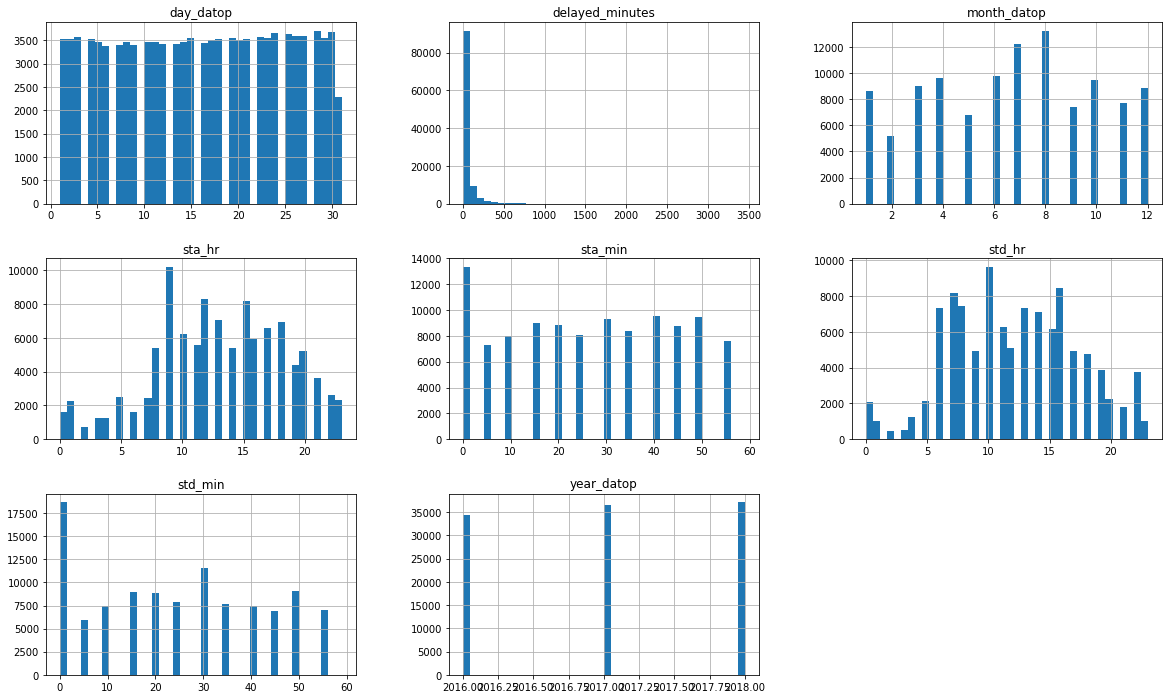

In [ ]:
train.hist(bins=40, figsize=(20, 12))
plt.show()

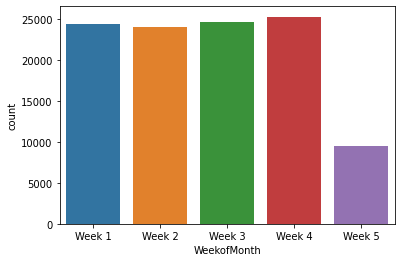

In [61]:
sns.countplot(train['WeekofMonth'])

- Week 4 has a slightly higher number of flights as compared to the other weeks with slightly higher than 25000 flights weekly as compared to the other weeks which have their value counts slightly lower than 25000. 

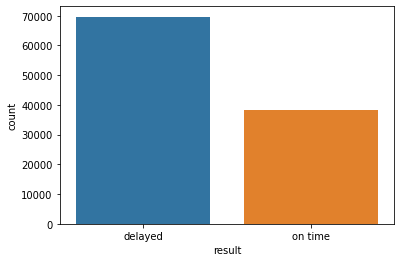

In [62]:
sns.countplot(train['result'])

- There are more delayed flights as compared to the flights that were on time for the period given(2016-2018) overally. 


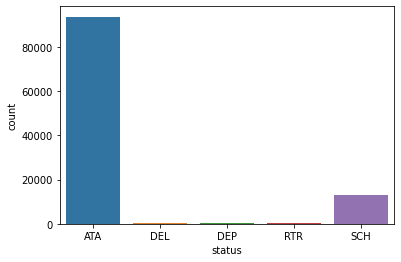

In [63]:
sns.countplot(train['status'])

- There was a higher number of fights that arrived at the Actual Time of Arrival(ATA).


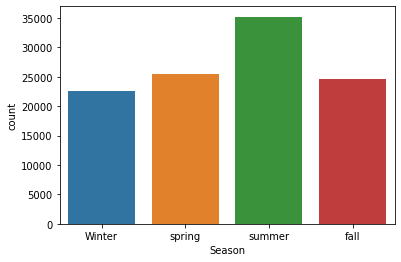

In [64]:
sns.countplot(train['Season'])

The hottest season / summer is in June, July, August and September. Tunis has dry periods in June, July and August. The warmest month is August with an average maximum temperature of 34°C (94°F). 
- This in turn makes it a high/peak season as most people would prefer to travel for holidays(summer)

In [65]:
numeric_cols = ['delayed_minutes', 'year_datop',
       'month_datop', 'day_datop', 'std_hr', 'std_min', 'sta_hr', 'sta_min']

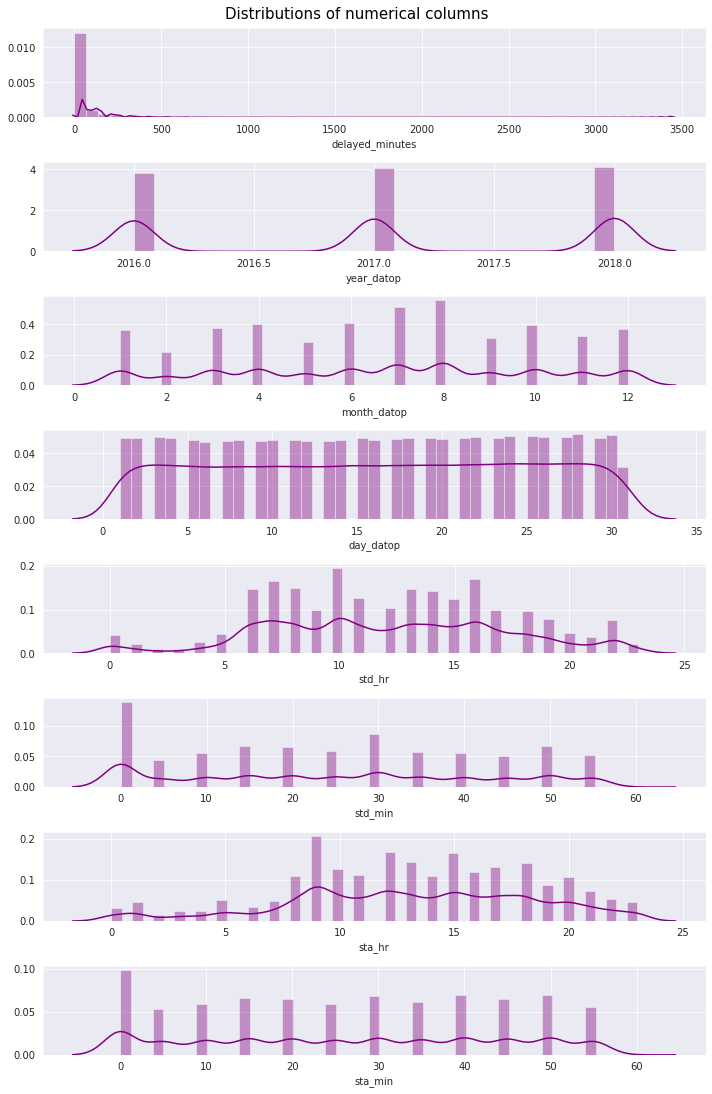

In [66]:
# DISTRIBUTION PLOTS  for numerical columns 
sns.set_style('darkgrid')
fig, axes = plt.subplots(len(numeric_cols), figsize = (10, 15))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), train, numeric_cols):
  sns.distplot(train[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()

- The year column is normally distributed with a trimodal distribution. 
- Delayed minutes  is positively skewed. 
- There is a steady increase in the number of delays during depatures and arrivals in the mid morning hours up until the late afternoons and evenings


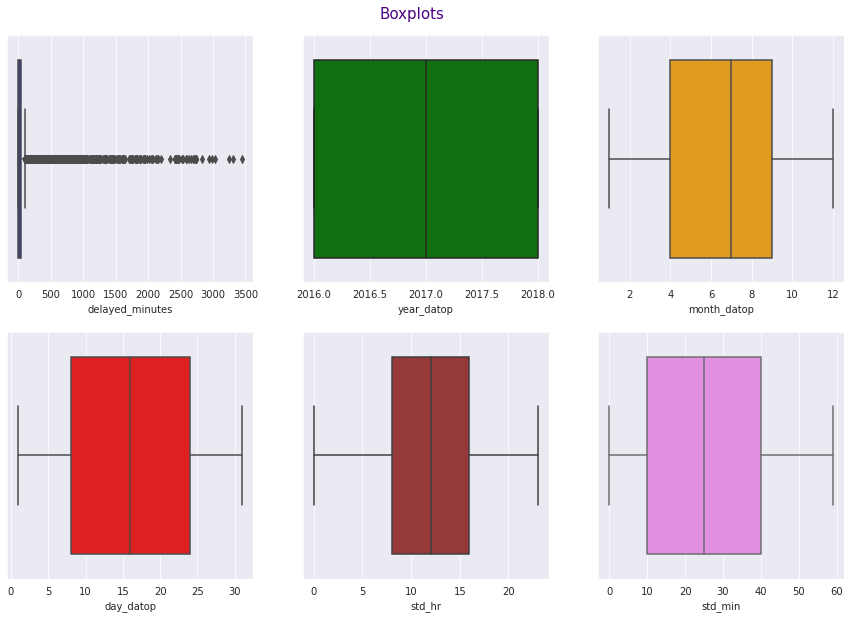

In [67]:
numeric_cols =['delayed_minutes', 'year_datop',
       'month_datop', 'day_datop', 'std_hr', 'std_min', 'sta_hr', 'sta_min']
numeric_cols

# BOXPLOTS 

# Creating a list of columns to check for outliers
# Creating a list of colors

numeric_cols

colors = ['blue', 'green', 'orange', 'red', 'brown', 'violet', 'purple', 'yellow']

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), train, numeric_cols, colors):
  sns.boxplot(train[column], ax = ax, color = color)

- All the Numerical columns in the dataset do not have outliers except for the delayed minutes columns. We will however not deal with the outliers in any way i.e drop them since this could be a true observation. 
-NB: The longest delay in history was that of The Pam Am Pacific Clipper which was delayed by a week(160 hours/9600 minutes) on the day of the Pearl Harbour attacks on 7th December 1941 hence giving more reason not to get rid of any outliers in the delayed minutes column. 

###Bivariate  Analysis

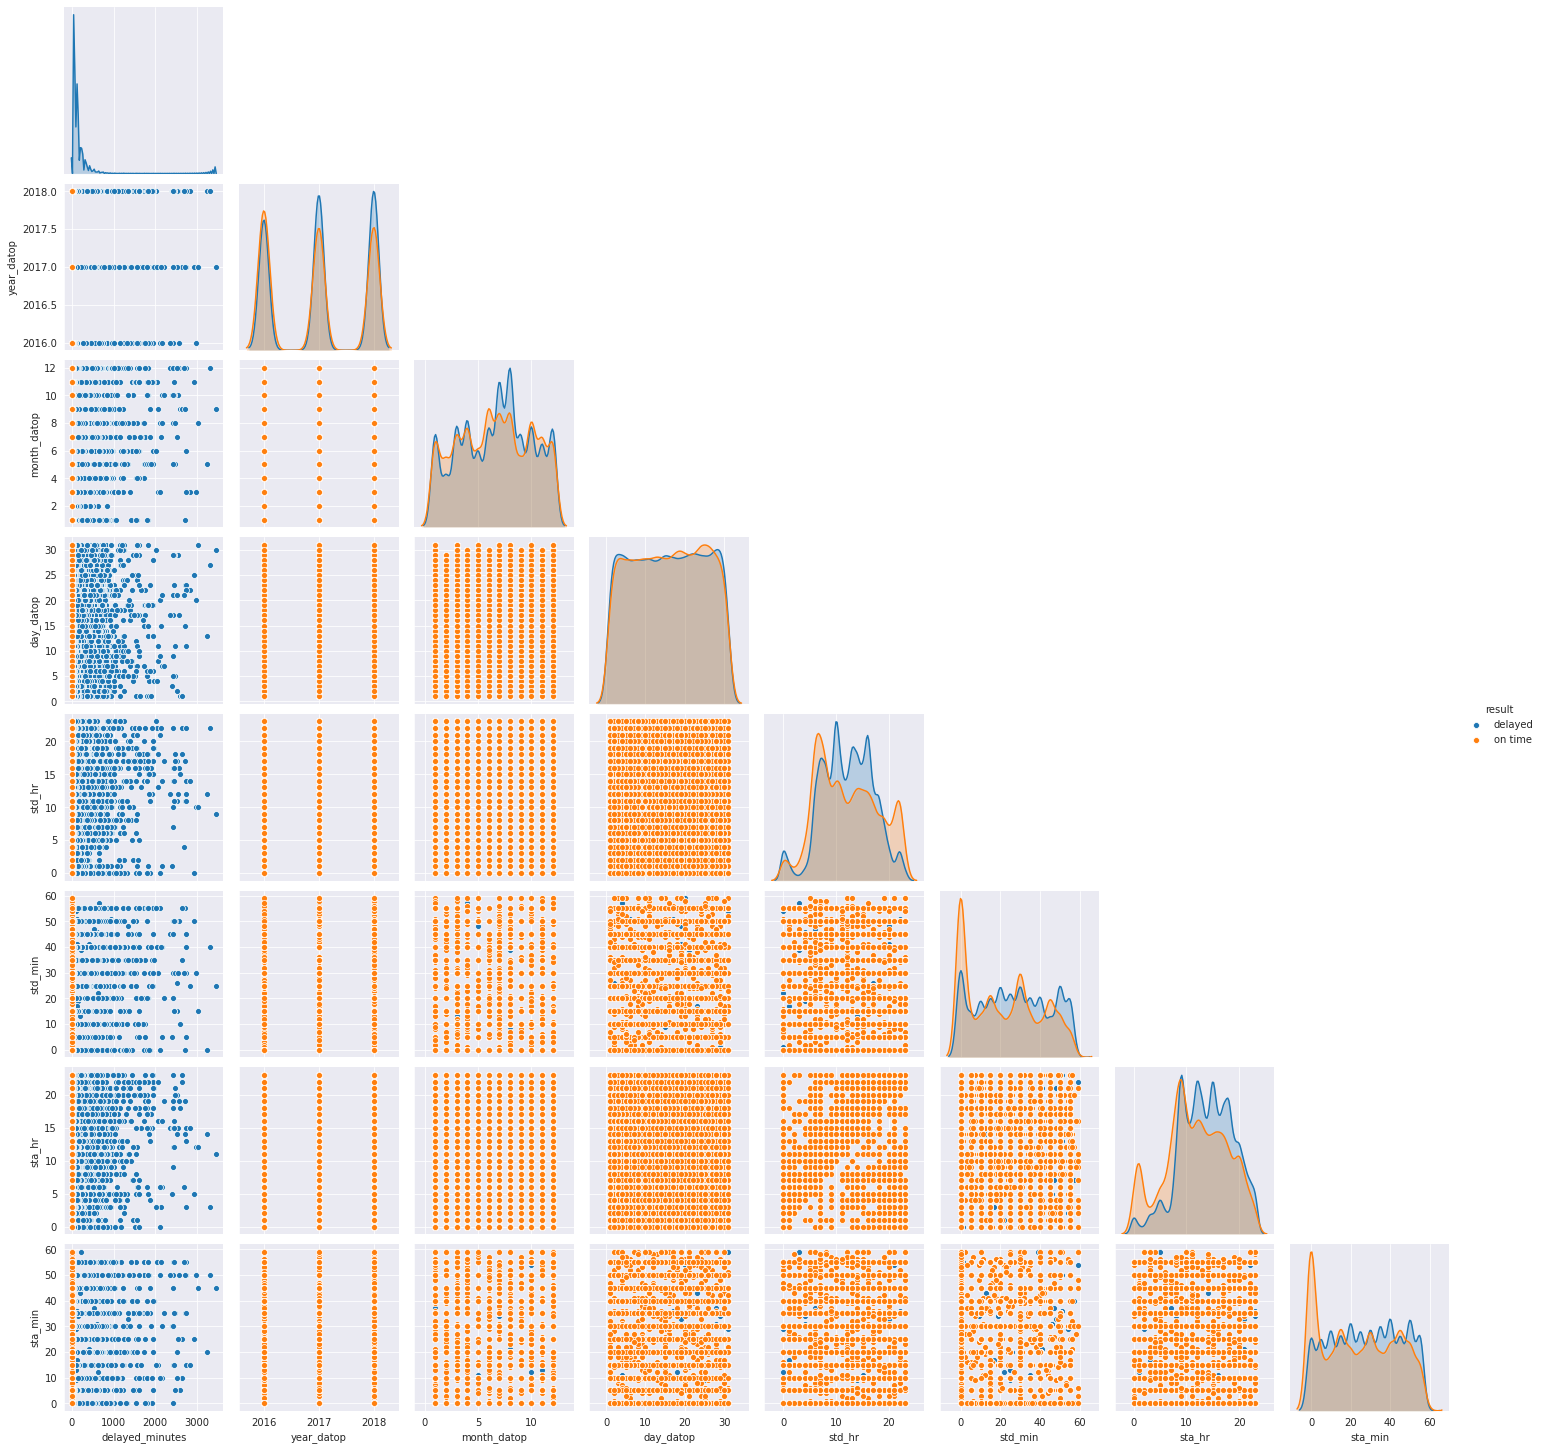

In [ ]:
sns.pairplot(train, hue="result", corner = True) 
plt.show()

From the pairplot:

1) Delayed minutes is positively skewed.

2) For the year 2016, there were more flights that were on time as compared to those that were not on time. However, for the other years 2017 and 2018, the number of delayed flights exceeded the number of flights that were on time. 

3) For the months, the months June to September had higher numbers of flight delays as compared to the flights on time. 

4) Early morning flights tend to have little to no delays as ompared to the afternoon and later in the day flights. 


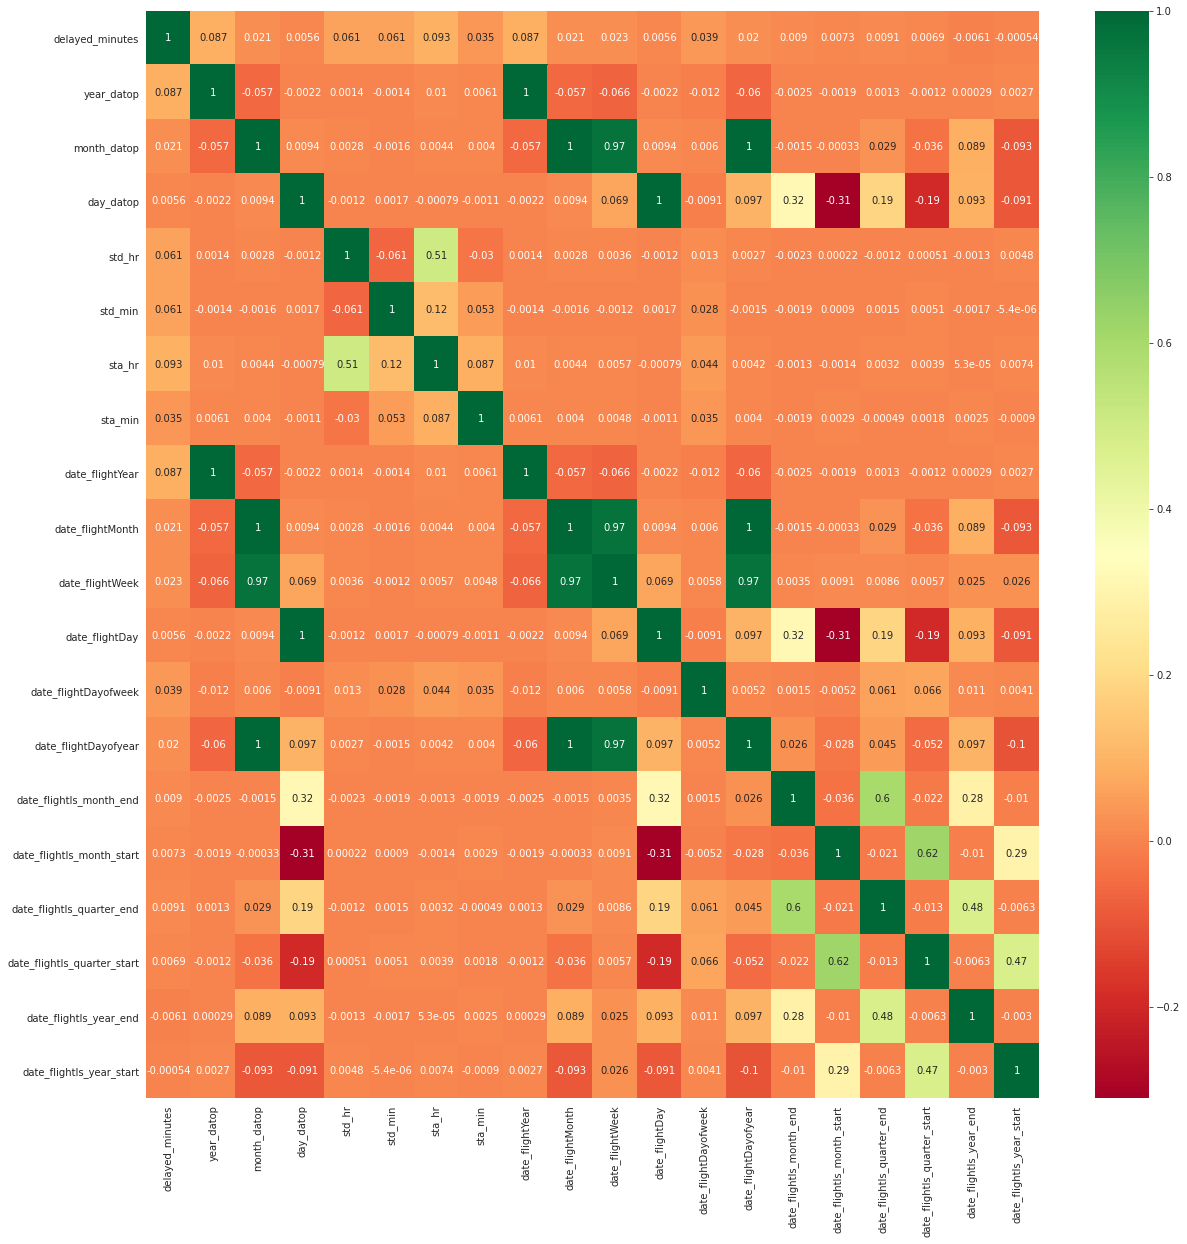

In [68]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Multivariate Analysis

In [ ]:
#Dropping the unnecessary columns
train = train.drop(['id', 'scheduled_time_departure', 'scheduled_time_arrival', 'date_flight', 'flight_number'],axis=1)
test = test.drop(['id', 'scheduled_time_departure', 'scheduled_time_arrival','date_flight', 'flight_number'],axis=1)

In [ ]:
X.dtypes

date_flight        datetime64[ns]
flight_number            category
departure_point          category
arrival_point            category
status                   category
aircraft_code            category
year_datop                  int64
month_datop                 int64
day_datop                   int64
std_hr                      int64
std_min                     int64
sta_hr                      int64
sta_min                     int64
dtype: object

In [ ]:
#One hot encoding our data for the categorical variables
#X = pd.get_dummies(X, drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['departure_point'] = le.fit_transform(train['departure_point'])
train['arrival_point'] = le.fit_transform(train['arrival_point'])
train['status'] = le.fit_transform(train['status'])
train['aircraft_code'] = le.fit_transform(train['aircraft_code'])


In [ ]:
#Multivariate Analysis
#Defining the predictor variables and target variables in our dataset.
X = train.drop(['delayed_minutes'],axis=1)
y = train['delayed_minutes'].values.reshape(-1,1)
print(X.shape)
print(y.shape)

(107833, 11)
(107833, 1)


In [ ]:
# This following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature scaling
# While performing feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Step 6: Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.


Linear Discriminant Analysis (LDA) is a simple and powerful linear transformation that is most commonly used as dimensionality reduction technique in the pre-processing step for machine learning applications. The goal of linear discriminant analysis is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and also reduce computational costs.
Multi-variate analysis enables:

The exploration of data structures and patterns.
Probability computations of multi-dimensional regions.
The study and measurement of relationships.
Normal and general multivariate models and distribution theory.

In [ ]:
# applying Linear Discriminant Analysis

# printing factors that affect the delay in minutes in order of how much weight each of the factors carry 
factors = pd.DataFrame (index= X.columns.values, data = lda.coef_[0].T)
factors.sort_values(0, ascending = False)


,0
status,0.888990
aircraft_code,0.086662
day_datop,0.014425
month_datop,-0.015440
sta_min,-0.032277
std_min,-0.077389
std_hr,-0.083168
arrival_point,-0.096478
year_datop,-0.099452
sta_hr,-0.138065


## 8. Implementing the Solution

In [64]:
# Implementing the Solution

# make a copy of the data sets 
df = train.copy()
df_t = test.copy()

In [65]:
# check number of rows and columns in the data set
print("There are", df.shape[0], "rows and", df.shape[1], "columns in our data set.")

There are 107833 rows and 31 columns in our data set.


In [66]:
# check number of rows and columns in the data set
print("There are", df_t.shape[0], "rows and", df_t.shape[1], "columns in our data set.")

There are 9333 rows and 30 columns in our data set.


In [67]:
# preview the train data set 
df.head()

,id,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,delayed_minutes,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min,date_flightYear,date_flightMonth,date_flightWeek,date_flightDay,date_flightDayofweek,date_flightDayofyear,date_flightIs_month_end,date_flightIs_month_start,date_flightIs_quarter_end,date_flightIs_quarter_start,date_flightIs_year_end,date_flightIs_year_start,result,Season,WeekofMonth
0,train_id_0,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,10,30,12,55,2016,1,53,3,6,3,False,False,False,False,False,False,delayed,Winter,Week 1
1,train_id_1,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,15,5,16,55,2016,1,2,13,2,13,False,False,False,False,False,False,delayed,Winter,Week 2
2,train_id_2,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,1,16,4,10,6,45,2016,1,2,16,5,16,False,False,False,False,False,False,on time,Winter,Week 3
3,train_id_3,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,1,17,14,10,17,0,2016,1,2,17,6,17,False,False,False,False,False,False,on time,Winter,Week 3
4,train_id_4,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,1,17,14,30,15,50,2016,1,2,17,6,17,False,False,False,False,False,False,delayed,Winter,Week 3


In [68]:
# preview the test dataset
df_t.head()

,id,flight_number,departure_point,arrival_point,scheduled_time_departure,scheduled_time_arrival,status,aircraft_code,year_datop,month_datop,day_datop,std_hr,std_min,sta_hr,sta_min,date_flightYear,date_flightMonth,date_flightWeek,date_flightDay,date_flightDayofweek,date_flightDayofyear,date_flightIs_month_end,date_flightIs_month_start,date_flightIs_quarter_end,date_flightIs_quarter_start,date_flightIs_year_end,date_flightIs_year_start,date_flightElapsed,Season,WeekofMonth
0,test_id_0,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07:30:00,ATA,TU 32AIMF,2016,5,4,6,40,7,30,2016,5,18,4,2,125,False,False,False,False,False,False,1462320000,spring,Week 1
1,test_id_1,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20:05:00,ATA,TU 320IMW,2016,5,5,15,20,20,5,2016,5,18,5,3,126,False,False,False,False,False,False,1462406400,spring,Week 1
2,test_id_2,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12:25:00,ATA,TU 32AIMC,2016,5,6,10,0,12,25,2016,5,18,6,4,127,False,False,False,False,False,False,1462492800,spring,Week 1
3,test_id_3,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13:10:00,ATA,TU 31BIMO,2016,5,11,9,40,13,10,2016,5,19,11,2,132,False,False,False,False,False,False,1462924800,spring,Week 2
4,test_id_4,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12:35:00,ATA,TU 736IOQ,2016,5,11,9,50,12,35,2016,5,19,11,2,132,False,False,False,False,False,False,1462924800,spring,Week 2


#### Cat boot regressor

In [69]:
# get the data types
df.dtypes

id                                     object
flight_number                        category
departure_point                      category
arrival_point                        category
scheduled_time_departure       datetime64[ns]
scheduled_time_arrival         datetime64[ns]
status                               category
aircraft_code                        category
delayed_minutes                       float64
year_datop                              int64
month_datop                             int64
day_datop                               int64
std_hr                                  int64
std_min                                 int64
sta_hr                                  int64
sta_min                                 int64
date_flightYear                         int64
date_flightMonth                        int64
date_flightWeek                         int64
date_flightDay                          int64
date_flightDayofweek                    int64
date_flightDayofyear              

In [70]:

class cat:
  def __init__ (self, X, y, test_features, X_test):
    self.X = X
    self.y = y
    self.test_features = test_features 
    self.X_test = X_test
  def cats(self):
    # Train using 70% of the data.
    X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
    categ_id = np.where(X_train.dtypes != 'int')[0]
    print(categ_id)
    # fitting the model 
    model = CatBoostRegressor(iterations = 700, depth = 10, l2_leaf_reg = 7, learning_rate = 0.1, task_type = 'GPU')
    model.fit(X_train, y_train, verbose = False, cat_features = categ_id)
    # making predictions 
    pred = model.predict(X_test1)
    # find the rmse 
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))  

    def imp(self, X):
      importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
      importances = importances.sort_values('importance',ascending=False).set_index('feature')
      print("The feature importances are shown below: ",importances)
      # bar plot of the feature importances
      plt.figure(figsize=(20, 7))
      importances.plot.bar(color ={'orange'})
      plt.ylabel('Feature importances')
      plt.xlabel('Features')
      
    imp(self, X)
    def catfish(self, X_test):
      y_pred = model.predict(X_test)
      # check if there are any values less than 0
      #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

      a = any(y_pred < 0)
   
      if a == True:
        print("There are values less than 0?", any(y_pred<0))
        # display those values 
        #print(y_pred[y_pred < 0])
        # change those values to 0
        y_pred[y_pred < 0] = 0
        print("There are values less than 0?", any(y_pred<0))
        # write to csv
        result = pd.DataFrame({'ID':df_t["id"],'target':y_pred})
        result.to_csv("result.csv",index=False)
      else:
        # write to csv
        result = pd.DataFrame({'ID':df_t["id"],'target':y_pred})
        result.to_csv("result.csv",index=False)
    catfish(self, X_test)

      

In [71]:
# get the dependent and independent variables 
test_features = ['flight_number', 'departure_point', 'arrival_point','status',
       'aircraft_code', 'year_datop', 'month_datop',
       'day_datop', 'std_hr', 'std_min', 'sta_hr', 'sta_min',
       'date_flightYear', 'date_flightMonth', 'date_flightWeek',
       'date_flightDay', 'date_flightDayofweek', 'date_flightDayofyear',
       'date_flightIs_month_end', 'date_flightIs_month_start',
       'date_flightIs_quarter_end', 'date_flightIs_quarter_start',
       'date_flightIs_year_end', 'date_flightIs_year_start', 
       'Season', 'WeekofMonth']

feat = ['flight_number', 'departure_point', 'arrival_point', 'status',
       'aircraft_code', 'year_datop', 'month_datop', 'day_datop', 'std_hr',
       'std_min', 'sta_hr', 'sta_min', 'date_flightYear', 'date_flightMonth',
       'date_flightWeek', 'date_flightDay', 'date_flightDayofweek',
       'date_flightDayofyear', 'date_flightIs_month_end',
       'date_flightIs_month_start', 'date_flightIs_quarter_end',
       'date_flightIs_quarter_start', 'date_flightIs_year_end',
       'date_flightIs_year_start', 'Season', 'WeekofMonth']


In [ ]:
X_test.dtypes

In [ ]:
df_t['Season'] = df_t['Season'].astype('category')
df_t['WeekofMonth'] = df_t['WeekofMonth'].astype('category')

In [ ]:
X.shape

In [ ]:
X_test.shape

### Baseline Model

[ 0  1  2  3  4 18 19 20 21 22 23 24 25]
Root Mean Squared Error: 112.16190943583554
The feature importances are shown below:                               importance
feature                                
flight_number                    16.443
departure_point                  14.414
arrival_point                    12.408
date_flightDayofyear             10.889
aircraft_code                     8.100
status                            7.983
WeekofMonth                       5.849
Season                            5.627
date_flightWeek                   4.021
date_flightDay                    2.783
std_hr                            2.499
sta_hr                            1.783
sta_min                           1.696
std_min                           1.535
day_datop                         1.385
month_datop                       1.268
date_flightMonth                  1.038
date_flightDayofweek              0.109
date_flightIs_month_end           0.061
date_flightIs_quarter_start      

<Figure size 1440x504 with 0 Axes>

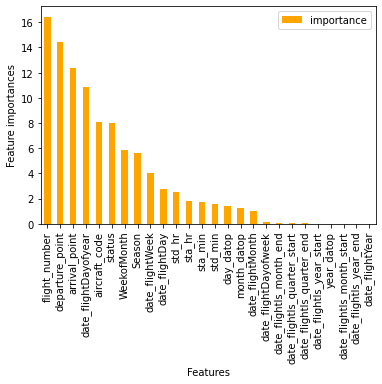

In [73]:
X = df[test_features]

y = df['delayed_minutes']
X_test = df_t[feat]
b = cat(X, y, test_features, X_test)
b.cats()

In [74]:
df.columns

Index(['id', 'flight_number', 'departure_point', 'arrival_point',
       'scheduled_time_departure', 'scheduled_time_arrival', 'status',
       'aircraft_code', 'delayed_minutes', 'year_datop', 'month_datop',
       'day_datop', 'std_hr', 'std_min', 'sta_hr', 'sta_min',
       'date_flightYear', 'date_flightMonth', 'date_flightWeek',
       'date_flightDay', 'date_flightDayofweek', 'date_flightDayofyear',
       'date_flightIs_month_end', 'date_flightIs_month_start',
       'date_flightIs_quarter_end', 'date_flightIs_quarter_start',
       'date_flightIs_year_end', 'date_flightIs_year_start', 'result',
       'Season', 'WeekofMonth'],
      dtype='object')

### Cat model with important features

In [76]:
# get 10 of the most important features 
train_f = ['flight_number', 'departure_point', 'arrival_point', 'status', 'aircraft_code', 'date_flightYear', 'Season', 'WeekofMonth',
'date_flightWeek', 'date_flightDay']
test_f = ['flight_number', 'departure_point', 'arrival_point', 'status', 'aircraft_code', 'date_flightYear', 'Season', 'WeekofMonth',
'date_flightWeek', 'date_flightDay']
X = df[train_f]
y = df['delayed_minutes']
X_test = df_t[test_f]

[0 1 2 3 4 6 7]
Root Mean Squared Error: 111.65127978999999
The feature importances are shown below:                   importance
feature                    
flight_number        27.325
arrival_point        17.051
departure_point      15.834
aircraft_code        11.758
date_flightWeek       6.824
Season                6.041
date_flightDay        5.758
WeekofMonth           5.658
status                3.751
date_flightYear       0.000
There are values less than 0? True
There are values less than 0? False


<Figure size 1440x504 with 0 Axes>

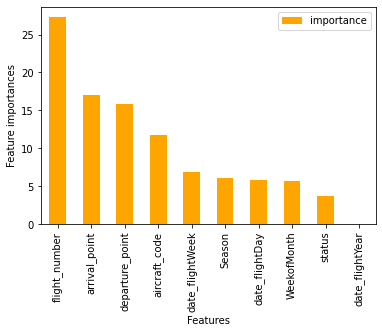

In [77]:
b = cat(X, y, test_features, X_test)
b.cats()

The RMSE of the model has dropped.

### Tuned cat model

## 9. Challenging the solution

#### NN regressor

In [84]:
#### 1 represents 'tanh' 2 represents 'identity' 3 respresents 'logistic' anything else is 'relu'
# the default.

class nn:
  def __init__(self, X, y, a, X_test):
    self.X = X
    self.y = y
    self.a = a
    self.X_test = X_test
  def n(self, a):
    if a == 1:
      x = 'tanh'
    elif a == 2:
      x = 'identity'
    elif a == 3:
      x = 'logistic'
    else:
      x = 'relu'
   
    
    def magic(self):
      # Splitting the data into train and test sets
      X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

      
      # Initialize the scaler
      scaler = StandardScaler()
      # Fitting the scaler
      scaler.fit(X_train)

      # Applying the transformation to the data
      X_train = scaler.transform(X_train)

      X_test1 = scaler.transform(X_test1)
      # creating instance of the model
      mlp = MLPRegressor(hidden_layer_sizes=(50,50), solver='sgd', activation=x) 
      print(mlp)
      # fitting the data
      mlp.fit(X_train,y_train)
      pred = mlp.predict(X_test1.reshape(-1,1))
      print("The activation used is :", x)
      # Evaluating the performance of ur model
      #print(confusion_matrix(y_test,pred))
      print('-----------------------------------------------')
      #print(classification_report(y_test,pred))
      # predict the test data 
      preds = mlp.predict(X_test)
      # Our first metric is MAE - Mean absolute error
      print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))

      # We can also use MSE - Mean squared error
      print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))  

      # Finally, the most popular metric: RMSE - Root mean squared error
      print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))  
      result = pd.DataFrame({'ID':df_t["id"],'target':preds})
      result.to_csv(f"result_nn_{x}_.csv",index=False)
    magic(self)
     

In [99]:
# get the dependent and independent variables 
test_features = ['flight_number', 'departure_point', 'arrival_point','status',
       'aircraft_code', 'year_datop', 'month_datop',
       'day_datop', 'std_hr', 'std_min', 'sta_hr', 'sta_min',
       'date_flightYear', 'date_flightMonth', 'date_flightWeek',
       'date_flightDay', 'date_flightDayofweek', 'date_flightDayofyear',
       'date_flightIs_month_end', 'date_flightIs_month_start',
       'date_flightIs_quarter_end', 'date_flightIs_quarter_start',
       'date_flightIs_year_end', 'date_flightIs_year_start', 
       ]

feat = ['flight_number', 'departure_point', 'arrival_point', 'status',
       'aircraft_code', 'year_datop', 'month_datop', 'day_datop', 'std_hr',
       'std_min', 'sta_hr', 'sta_min', 'date_flightYear', 'date_flightMonth',
       'date_flightWeek', 'date_flightDay', 'date_flightDayofweek',
       'date_flightDayofyear', 'date_flightIs_month_end',
       'date_flightIs_month_start', 'date_flightIs_quarter_end',
       'date_flightIs_quarter_start', 'date_flightIs_year_end',
       'date_flightIs_year_start', 'Season', 'WeekofMonth']



## using Identity activation

In [85]:
X = df[test_features]
X = pd.get_dummies(X)
y = df['delayed_minutes']
X_test = df_t[feat]
# call the class
a = 2
b = nn(X, y, a, X_test)
# call the function
b.n(a)

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


ValueError: ignored

##### Using Logistic activation

In [ ]:
# call the class
a = 3
b = nn(X, y, a, X_test)
# call the function
b.n(a)

##### Using relu activation

In [ ]:
# call the class
a = 0
b = nn(X, y, a, X_test)
# call the function
b.n(a)

##### Using tahn activation

In [ ]:
# call the class
a = 1
b = nn(X, y, a, X_test)
# call the function
b.n(a)

### Keras

In [86]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [100]:
X = df[test_features]

y = df['delayed_minutes']
X_test = df_t[feat]

In [92]:
X.columns

Index(['flight_number', 'departure_point', 'arrival_point', 'status',
       'aircraft_code', 'year_datop', 'month_datop', 'day_datop', 'std_hr',
       'std_min', 'sta_hr', 'sta_min', 'date_flightYear', 'date_flightMonth',
       'date_flightWeek', 'date_flightDay', 'date_flightDayofweek',
       'date_flightDayofyear', 'date_flightIs_month_end',
       'date_flightIs_month_start', 'date_flightIs_quarter_end',
       'date_flightIs_quarter_start', 'date_flightIs_year_end',
       'date_flightIs_year_start', 'Season', 'WeekofMonth'],
      dtype='object')

In [94]:
colNames = ['flight_number','status', 'aircraft_code', 'Season','WeekofMonth']
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(df.shape[1]))
df = oneHotEncode(df, colNames)
print('There are {} columns after encoding categorical features'.format(df.shape[1]))

There were 31 columns before encoding categorical features
There are 38 columns after encoding categorical features


In [101]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               4096      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 168,961
Trainable params: 168,961
Non-trainable params: 0
_________________________________________________________________


In [102]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [104]:
X = np.asarray(X)
NN_model.fit(X, y, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


ValueError: ignored

In [ ]:

# Load wights file of the best model :
wights_file = 'Weights-478--18738.19831.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

## 10. Conclusion

### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?